In [1]:
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
%matplotlib inline

The sourcec code obtained from https://data-flair.training/blogs/advanced-python-project-detecting-fake-news/

In [2]:
df = pd.read_csv('news.csv')

In [3]:
df.shape

(6335, 4)

In [4]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [5]:
labels = df.label
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [6]:
df['text']

0       Daniel Greenfield, a Shillman Journalism Fello...
1       Google Pinterest Digg Linkedin Reddit Stumbleu...
2       U.S. Secretary of State John F. Kerry said Mon...
3       — Kaydee King (@KaydeeKing) November 9, 2016 T...
4       It's primary day in New York and front-runners...
                              ...                        
6330    The State Department told the Republican Natio...
6331    The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...
6332     Anti-Trump Protesters Are Tools of the Oligar...
6333    ADDIS ABABA, Ethiopia —President Obama convene...
6334    Jeb Bush Is Suddenly Attacking Trump. Here's W...
Name: text, Length: 6335, dtype: object

In [7]:
X_train_pa, X_test_pa, y_train_pa, y_test_pa = train_test_split(df['text'], labels, test_size=0.2, random_state=7)

In [8]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train = tfidf_vectorizer.fit_transform(X_train_pa) 
tfidf_test = tfidf_vectorizer.transform(X_test_pa)

In [9]:
pac = PassiveAggressiveClassifier(max_iter = 50)
pac.fit(tfidf_train, y_train_pa)
#DataFlair - Predict on the test set and calculate accuracy
y_pred_pa = pac.predict(tfidf_test)
score = accuracy_score(y_test_pa, y_pred_pa)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 92.74%


Data clean-up, delete missing datas from news.csv and save to news_clean.csv

**這段跑一次即可，不然會出現錯誤訊息，因為已經原資料已經修改過了

In [10]:
empty = []
for i in range(len(df.text)):
    if(df.text[i] == ' '):
        empty.append(i)
df = df.drop(empty)
df = df.drop(columns = ['Unnamed: 0'])
df.reset_index(drop=True)
df.to_csv('News_clean.csv')
# Save cleaned data to news_clean.csv
df_new = pd.read_csv('News_clean.csv').drop(columns = ['Unnamed: 0'])
df_new.head()

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [11]:
df_new.shape

(6299, 3)

In [12]:
df_new['text'] = df_new['text'].str.lower()

In [13]:
import string
def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = "".join(all_list)
    return clean_str

for i in range(len(df_new['text'])):
    df_new['text'][i] = punctuation_removal(df_new['text'][i])

In [14]:
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(df_new['text'], df_new.label, test_size = 0.2, random_state = 7)

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train_svm = tfidf_vectorizer.fit_transform(X_train_svm) 
tfidf_test_svm = tfidf_vectorizer.transform(X_test_svm)

In [15]:
from sklearn.svm import SVC
svm = SVC(kernel = 'linear', probability=True)
###kernel !!!

In [16]:
y_train_svm = LabelEncoder().fit_transform(y_train_svm)
y_test_svm = LabelEncoder().fit_transform(y_test_svm)
# real = 1, fake = 0

In [17]:
svm.fit(tfidf_train_svm, y_train_svm)

SVC(kernel='linear', probability=True)

In [18]:
y_pred_svm = svm.predict(tfidf_test_svm)

In [19]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test_svm, y_pred_svm)
score

0.9484126984126984

In [20]:
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(confusion_matrix, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    fig, ax = plt.subplots(figsize=(20, 10))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    plt.show()

Accuracy
- linear: 0.9484126984126984
- rbf: 0.9341269841269841
- sigmoid: 0.9436507936507936

Confusion matrix, without normalization


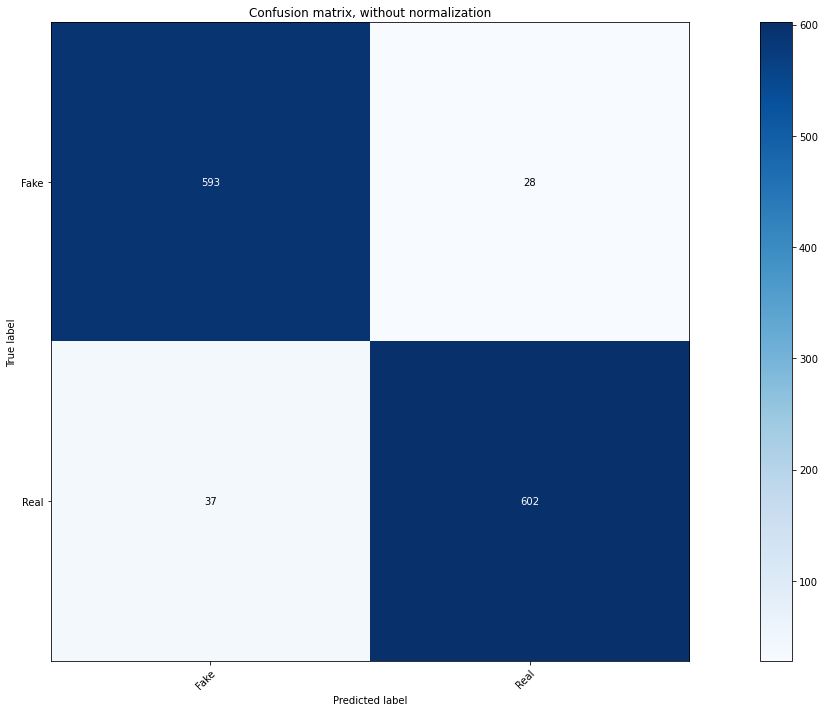

              precision    recall  f1-score   support

        FAKE       0.94      0.95      0.95       621
        REAL       0.96      0.94      0.95       639

    accuracy                           0.95      1260
   macro avg       0.95      0.95      0.95      1260
weighted avg       0.95      0.95      0.95      1260

mean absolute error: 0.051587301587301584


In [21]:
cm = confusion_matrix(y_test_svm, y_pred_svm)
plot_confusion_matrix(cm, classes = ['Fake', 'Real'])
classes = ['FAKE', 'REAL']
print(classification_report(y_test_svm, y_pred_svm, target_names = classes))
print("mean absolute error:", mean_absolute_error(y_test_svm, y_pred_svm))

label
FAKE    3128
REAL    3171
Name: text, dtype: int64


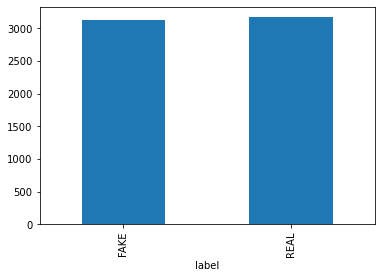

In [23]:
print(df_new.groupby(['label'])['text'].count())
df_new.groupby(['label'])['text'].count().plot(kind="bar")
plt.show()

# TEST
> dataset for testing is from: https://ieee-dataport.org/open-access/fnid-fake-news-inference-dataset

In [25]:
df_test = pd.read_csv("fnn_test.csv")

In [30]:
df_test['fullText_based_content'] = df_test['fullText_based_content'].str.lower()
df_test['fullText_based_content'] = df_test['fullText_based_content'].apply(punctuation_removal)
y_test = LabelEncoder().fit_transform(df_test['label_fnn'])

In [33]:
test = df_test['fullText_based_content']
error = 0
for i in range(len(test)):
    test_tfi = tfidf_vectorizer.transform([test[i]])
    pred = svm.predict(test_tfi)
    if pred == y_test[i]:
        error += 1
print("accuracy: ", (error/len(test)))

accuracy:  0.816888045540797
